In [1]:
import setup

In [2]:
import importlib
importlib.reload(setup)

<module 'setup' from '/home/guillermo/Nextcloud/projects/Distributed_Q_gates_clean/Codes/setup.py'>

In [3]:
import numpy as np
import os.path
from numpy import pi, floor, sqrt
from math import pi as π
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [4]:
# Trick to make sure we allow pickle when loading the arrays 
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
## original Guillermo's code
styles = ['science']
prefix = '../stylelib/'
sufix = '.mplstyle'
for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix
plt.style.use(styles)
plt.rcParams.update({'font.size': 20})
plt.rcParams['axes.linewidth'] = 2 #set the value globally

In [ ]:
phase_gate_30m_30MHz = np.load('../Data/phase_gate_30m_30MHz.npy')
phase_gate_30m_50MHz = np.load('../Data/phase_gate_30m_50MHz.npy')
phase_gate_30m_100MHz = np.load('../Data/phase_gate_30m_100MHz.npy')
phase_gate_30m_200MHz = np.load('../Data/phase_gate_30m_200MHz.npy')

phase_gate_5m_100MHz = np.load('phase_gate_5m_100MHz.npy')
phase_gate_5m_50MHz = np.load('phase_gate_5m_50MHz.npy')
phase_gate_5m_30MHz = np.load('phase_gate_5m_30MHz.npy')

In [ ]:
F_30m_30MHz_asim =np.load('F_30m_30MHz_asim.npy')
F_30m_50MHz_asim =np.load('F_30m_50MHz_asim.npy')
F_30m_100MHz_asim =np.load('F_30m_100MHz_asim.npy')
F_30m_200MHz_asim =np.load('F_30m_200MHz_asim.npy')
F_5m_30MHz_asim =np.load('F_5m_30MHz_asim.npy')
F_5m_50MHz_asim =np.load('F_5m_50MHz_asim.npy')
F_5m_100MHz_asim =np.load('F_5m_100MHz_asim.npy')

In [ ]:
F_30m_200MHz_theory =np.load('F_30m_200MHz_theory.npy')
F_30m_100MHz_theory =np.load('F_30m_100MHz_theory.npy')
F_30m_50MHz_theory =np.load('F_30m_50MHz_theory.npy')
F_30m_30MHz_theory =np.load('F_30m_30MHz_theory.npy')

F_5m_100MHz_theory =np.load('F_5m_100MHz_theory.npy')
F_5m_50MHz_theory =np.load('F_5m_50MHz_theory.npy')
F_5m_30MHz_theory =np.load('F_5m_30MHz_theory.npy')

In [8]:

P_transfer_30m = np.load('../Data/P_transfer_30m.npy')
P_transfer_5m = np.load('../Data/P_transfer_5m.npy')
P_transfer_1m_71modes = np.load('../Data/P_transfer_1m_71modes.npy')
P_transfer_30m_quarter = np.load('../Data/P_transfer_30m_quarter.npy')


In [9]:
all_kappas = 2*π*np.logspace(0.0, 2.0, 21)*1e-3

In [10]:
def diffraction(l=30,κ=100):
    vgroup=1.8762e8
    gamma_curv=1.04e6    
    return  (1+(8/5)*(l/vgroup)**2*(κ/np.sqrt(12)*1e9)**4/(vgroup**4)*gamma_curv**2)**-0.5

In [11]:
duration_30m = 2*(setup.Exp2QB2Cavities(l=30).tprop + 2*(10/(all_kappas*0.5)))
duration_30m, 2*(10/(all_kappas*0.5)), setup.Exp2QB2Cavities(l=30).tprop

(array([13052.19273059, 10433.49848275,  8353.39570358,  6701.11133495,
         5388.65520916,  4346.1342516 ,  3518.03041972,  2860.24416478,
         2337.74597007,  1922.71090141,  1593.03682798,  1331.16740319,
         1123.15712528,   957.92868841,   826.68307583,   722.43098008,
          639.62059689,   573.8419714 ,   521.59215193,   480.08864506,
          447.12123772]),
 array([6366.19772368, 5056.85059975, 4016.79921017, 3190.65702585,
        2534.42896296, 2013.16848418, 1599.11656824, 1270.22344077,
        1008.97434341,  801.45680908,  636.61977237,  505.68505998,
         401.67992102,  319.06570259,  253.4428963 ,  201.31684842,
         159.91165682,  127.02234408,  100.89743434,   80.14568091,
          63.66197724]),
 159.89864162161894)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


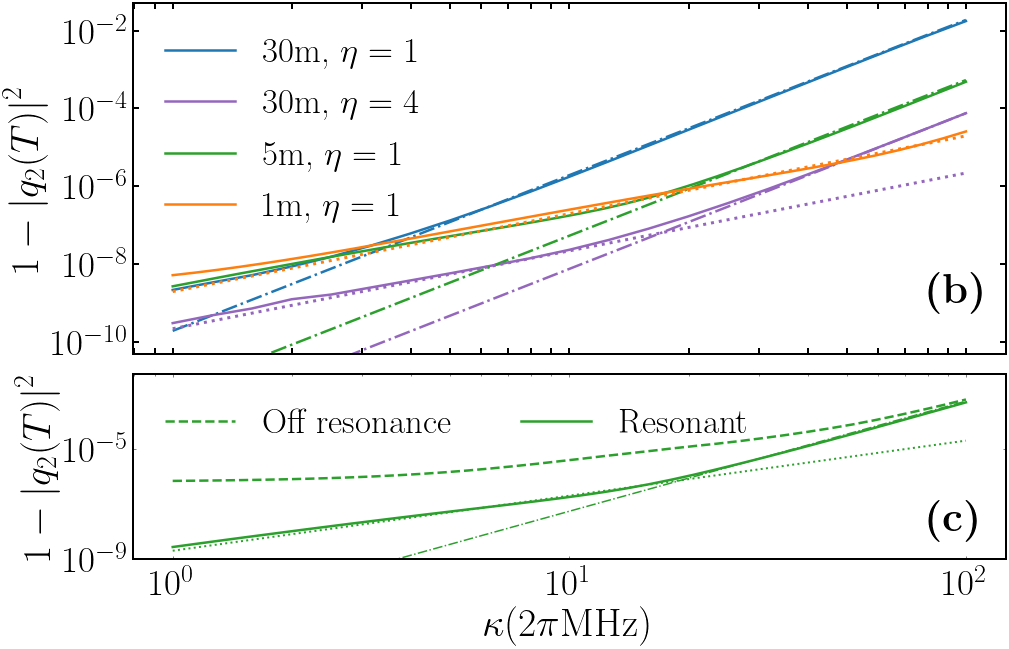

In [12]:
# plt.rcParams['axes.linewidth'] = 2 #Ricardo

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,9), sharex=True, constrained_layout=True,  gridspec_kw={'height_ratios': [1.9, 1]})
# plt.tight_layout()
plt.rcParams.update({'font.size': 35})

all_kappas = 2*π*np.logspace(0.0, 2.0, 21)*1e-3
fid_difr_30 = diffraction(l=30, κ=all_kappas)
fid_difr_30_quarter = diffraction(l=30, κ=all_kappas/4)
fid_difr_5 =  diffraction(l=5, κ=2*π*np.logspace(0.0, 2.0, 36)*1e-3)

ax1.plot(all_kappas/(2e-3*π),1-np.load('../Data/P_transfer_30m.npy')[:,0],linewidth=2.5, label= '30m, $\\eta = 1$', color='tab:blue')
ax1.plot(all_kappas/(2e-3*π), 1-fid_difr_30, '-.',linewidth=2.5, color='tab:blue')#, label = 'Diffraction 30m')

ax1.plot(all_kappas/(2e-3*π),1-np.load('../Data/P_transfer_30m_quarter.npy')[:,0],color='tab:purple',linewidth=2.5, label = '30m, $\\eta = 4$')
ax1.plot(all_kappas/(2e-3*π), 1-fid_difr_30_quarter, '-.',linewidth=2.5, color='tab:purple')#, label = 'Diffraction 30m, $\\tilde{\\kappa}=\\kappa/4$ ' )

all_kappas = 2*π*np.logspace(0.0, 2.0, 36)*1e-3
ax1.plot(all_kappas/(2e-3*π),1-np.load('../Data/P_transfer_5m.npy')[:,0],linewidth=2.5, color='tab:green', label= '5m, $\\eta = 1$')
ax1.plot(all_kappas/(2e-3*π), 1-fid_difr_5, '-.',linewidth=2.5, color='tab:green')#, label = 'Diffraction 5m, $\\tilde{\\kappa}=\\kappa$')

ax1.plot(all_kappas/(2e-3*π),1-np.load('../Data/P_transfer_1m_71modes.npy')[:,0],linewidth=2.5, color='tab:orange', label= '1m, $\\eta = 1$')

ax1.plot(all_kappas/(2e-3*π),all_kappas**2*1.5/3e4,':',color='tab:orange', linewidth=3)
ax1.plot(all_kappas/(2e-3*π),all_kappas**2/6/3e4,':',color='tab:purple', linewidth=3)

ax1.set_ylim(0.5e-10,0.5e-1)
ax1.semilogy()
ax1.semilogx()
ax1.set_ylabel('$$1-|q_2(T)|^2$$', {'fontsize': 40})
ax1.text(80, 1e-9,'\\textbf{(b)}',color='black', weight='bold', fontsize=42)

# 
ax1.tick_params(labelcolor='black', labelsize='small', width=2, length =6) #Ricardo
# ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.set_yticks([1e-10,1e-8,1e-6,1e-4,1e-2]) #,['10^1','10^2','10^3','10^4'])

ax1.tick_params(which='minor', color='black', width=2, length=6)

ax1.legend(loc='upper left', ncol=1)
# ax1.text(17, 1e-9,'\\textbf{(a)}',color='black', weight='bold', fontsize=40)
# ax2.text(17, 2e-1,'\\textbf{(b)}',color='black', weight='bold', fontsize=40)
ax1.yaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(pad=10)

plt.rcParams.update({'font.size': 35})
ax2.plot(all_kappas/(2e-3*π),1-np.load('../Data/P_transfer_5m_offresonance.npy')[:,0] , '--',linewidth=2.5, color='tab:green', label= 'Off resonance')
ax2.plot(all_kappas/(2e-3*π),1-np.load('../Data/P_transfer_5m.npy')[:,0],linewidth=2.5, color='tab:green', label= 'Resonant')
ax2.plot(all_kappas/(2e-3*π), 1-fid_difr_5, '-.',linewidth=1.5, color='tab:green')#, label = 'Diffraction 5m, $\\tilde{\\kappa}=\\kappa$')
ax2.plot(all_kappas/(2e-3*π),all_kappas**2*1.5/3e4,':',color='tab:green', linewidth=2)

ax2.set_xlabel('$$\\kappa(2\\pi \mathrm{MHz})$$', {'fontsize': 40})
ax2.set_ylabel('$$1-|q_2(T)|^2$$', {'fontsize': 40})
ax2.text(80, 1e-8,'\\textbf{(c)}',color='black', weight='bold', fontsize=42)


ax2.set_ylim(1e-9,0.5e-2)
ax2.yaxis.set_tick_params(labelsize=37)
ax2.xaxis.set_tick_params(labelsize=37)
ax2.xaxis.set_tick_params(pad=10)



ax2.semilogy()
ax2.semilogx()
ax2.legend(loc='best', ncol=2)


# fig.savefig('../Newfigures/fig2bc.svg')
# fig.savefig('../Newfigures/fig2bc.pdf')

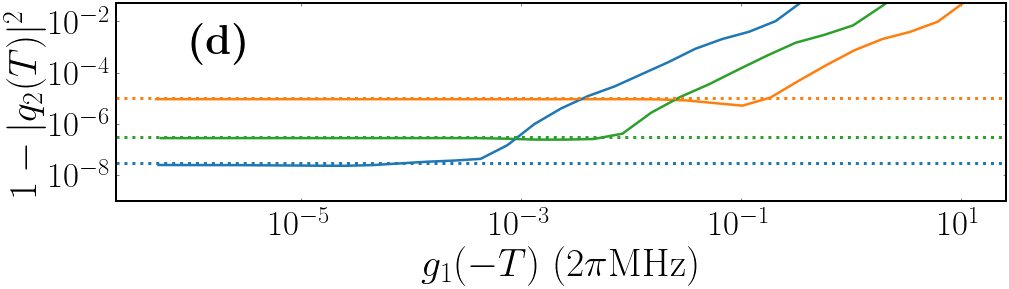

In [17]:
fig, (ax3) = plt.subplots(1, 1, figsize=(14,4),  constrained_layout=True)

pulse_shaping_30m_cutoff = np.load('../Data/pulse_shaping_30m_cutoff.npy')
pulse_shaping_5m_cutoff = np.load('../Data/pulse_shaping_5m_cutoff.npy')
pulse_shaping_1m_cutoff = np.load('../Data/pulse_shaping_1m_cutoff.npy')

ax3.loglog(pulse_shaping_1m_cutoff[:,10], 1-pulse_shaping_1m_cutoff[:,7],'-',linewidth=2.5, color='tab:orange', label =' 1 m' )
ax3.loglog(pulse_shaping_5m_cutoff[:,10], 1-pulse_shaping_5m_cutoff[:,7],'-',linewidth=2.5, color='tab:green', label =' 5 m' )
ax3.loglog(pulse_shaping_30m_cutoff[:,10], 1-pulse_shaping_30m_cutoff[:,7],'-',linewidth=2.5, color='tab:blue', label =' 30 m' )

ax3.set_ylabel('$1 - |q_2(T)|^2$', {'fontsize': 40})
ax3.set_xlabel('$g_1(-T)$ $(2 \pi$MHz) ', {'fontsize': 40})
ax3.axhline(y = 1e-05, linestyle = ':', linewidth=3, color='tab:orange')
ax3.axhline(y = 3e-07, linestyle = ':', linewidth=3, color='tab:green')
ax3.axhline(y = 2.9e-8, linestyle = ':', linewidth=3, color='tab:blue')
ax3.set_yticks([1e-8,1e-6,1e-4,1e-2]) #,['10^1','10^2','10^3','10^4'])

ax3.tick_params(which='minor', color='black', width=2, length=6)

ax3.set_ylim(1e-9, .5e-1)
ax3.text(1e-6, .5e-3,'\\textbf{(d)}',color='black', weight='bold', fontsize=42)
ax3.xaxis.set_tick_params(pad=10)

# ax3.legend()
plt.show()

fig.savefig('../Figures/fig2d.svg')
fig.savefig('../Figures/fig2d.pdf')

In [18]:
STIRAP_1m_comparison_times = np.load('../Data/STIRAP_1m_comparison_times.npy')
STIRAP_5m_comparison_times = np.load('../Data/STIRAP_5m_comparison_times.npy')
STIRAP_30m_comparison_times = np.load('../Data/STIRAP_30m_comparison_times.npy')

pulse_shaping_1m_comparison_times = np.load('../Data/pulse_shaping_1m_comparison_times.npy')
pulse_shaping_5m_comparison_times = np.load('../Data/pulse_shaping_5m_comparison_times.npy')
pulse_shaping_30m_comparison_times = np.load('../Data/pulse_shaping_30m_comparison_times.npy')

Direct_swap_1m_comparison_times = np.load('../Data/Direct_swap_1m_comparison_times.npy')
Direct_swap_5m_comparison_times = np.load('../Data/Direct_swap_5m_comparison_times.npy')
Direct_swap_30m_comparison_times = np.load('../Data/Direct_swap_30m_comparison_times.npy')

In [19]:
# adiabatic_state_transfer_30m_kappa3MHz#, adiabatic_state_transfer_5m_kappa18MHz  [:,9]  [:,0]

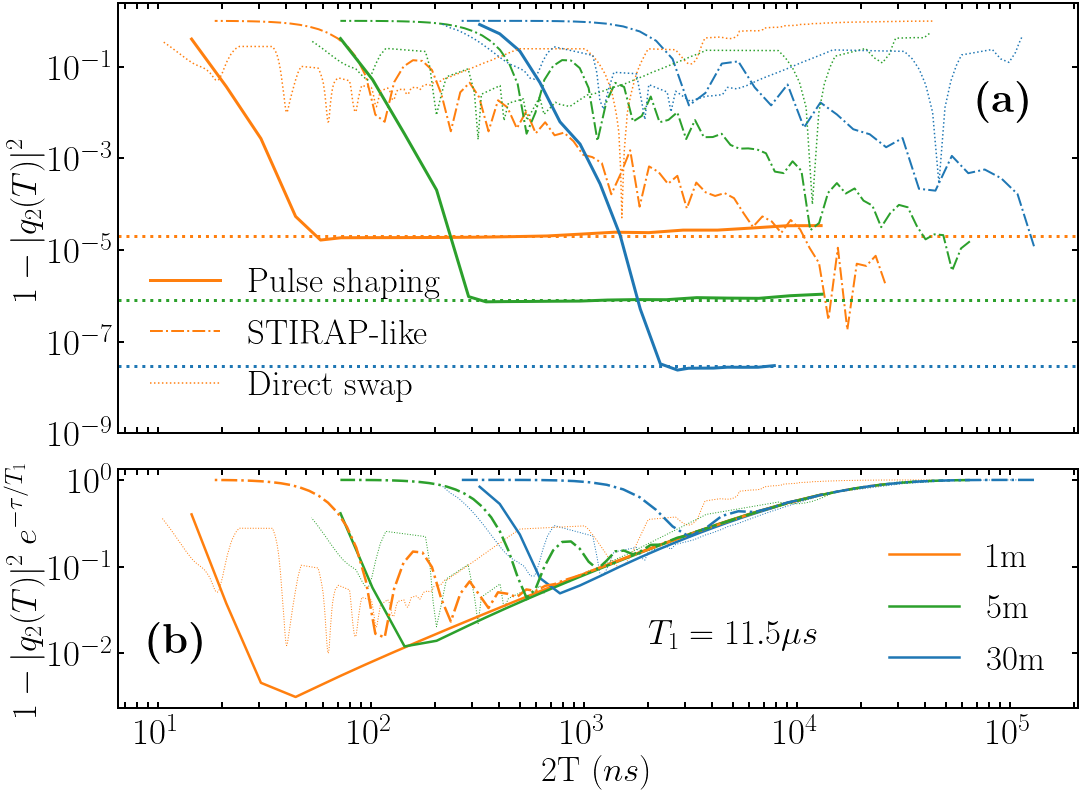

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,11), sharex=True, constrained_layout=True,  gridspec_kw={'height_ratios': [1.8, 1]})

plt.rcParams.update({'font.size': 35})

ax1.loglog(pulse_shaping_1m_comparison_times[:,9], 1-pulse_shaping_1m_comparison_times[:,0],'-',color='tab:orange', linewidth=3, label='Pulse shaping')
ax1.loglog(STIRAP_1m_comparison_times[:,9], 1-STIRAP_1m_comparison_times[:,0],'-.', color='tab:orange', linewidth=2, label='STIRAP-like')
ax1.set_ylabel('$$1-|q_2(T)|^2$$')
ax1.axhline(y = 2e-05, linestyle = ':', linewidth=3, color='tab:orange')

ax1.loglog(STIRAP_5m_comparison_times[:,9], 1-STIRAP_5m_comparison_times[:,0], '-.', linewidth=2, color='tab:green')
ax1.loglog(pulse_shaping_5m_comparison_times[:,9], 1-pulse_shaping_5m_comparison_times[:,0],'-', linewidth=3, color='tab:green')
ax1.axhline(y = 8e-07, linestyle = ':', linewidth=3, color='tab:green')

ax1.loglog(STIRAP_30m_comparison_times[:,9], 1-STIRAP_30m_comparison_times[:,0],'-.', linewidth=2, color='tab:blue')
ax1.loglog(pulse_shaping_30m_comparison_times[:,9], 1-pulse_shaping_30m_comparison_times[:,0],'-', linewidth=3, color='tab:blue')
ax1.axhline(y = 2.9e-8, linestyle = ':', linewidth=3, color='tab:blue')

ax1.loglog(Direct_swap_1m_comparison_times[:,9], 1-Direct_swap_1m_comparison_times[:,7],':', linewidth=1.5, color='tab:orange', label =' Direct swap')
ax1.loglog(Direct_swap_5m_comparison_times[:,9], 1-Direct_swap_5m_comparison_times[:,7],':', linewidth=1.5, color='tab:green')
ax1.loglog(Direct_swap_30m_comparison_times[:,9], 1-Direct_swap_30m_comparison_times[:,7],':', linewidth=1.5, color='tab:blue')



ax1.text(.7e5, 1e-2,'\\textbf{(a)}',color='black', weight='bold', fontsize=42)

ax1.tick_params(labelcolor='black', labelsize='small', width=2, length =6) #Ricardo
# ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.set_ylim(1e-8)

ax1.set_yticks([1e-9,1e-7,1e-5,1e-3,1e-1]) #,['10^1','10^2','10^3','10^4'])
ax1.tick_params(which='minor', color='black', width=2, length=6)


ax1.legend()


T1_1=11.5e-6*1e9

# ax2.loglog(adiabatic_state_transfer_1m_kappa90MHz[0],1-adiabatic_state_transfer_1m_kappa90MHz[1]*np.exp(-adiabatic_state_transfer_1m_kappa90MHz[0]/T1_1),'-.', linewidth=2.5, color='tab:orange')
# ax2.loglog(adiabatic_state_transfer_1m_kappa90MHz[0,:15],1-np.array(state_transfer_1m_comparison_times)*np.exp(-adiabatic_state_transfer_1m_kappa90MHz[0,:15]/T1_1),'-', linewidth=2.5, color='tab:orange', label=' 1m')
# # ax1.set_ylim(1e-3, 1)
# ax2.set_xlabel('Duration = 2T (ns)')
# ax2.set_ylabel('$$1-|q_2(T)|^2$$')

# ax2.loglog(adiabatic_state_transfer_5m_kappa18MHz[0],1-adiabatic_state_transfer_5m_kappa18MHz[1]*np.exp(-adiabatic_state_transfer_5m_kappa18MHz[0]/T1_1), '-.', linewidth=2.5, color='tab:green')
# ax2.loglog(adiabatic_state_transfer_5m_kappa18MHz[0,:15],1-np.array(state_transfer_5m_comparison_times)*np.exp(-adiabatic_state_transfer_5m_kappa18MHz[0,:15]/T1_1),'-', linewidth=2.5, color='tab:green',label='5m')

# ax2.loglog(adiabatic_state_transfer_30m_kappa3MHz[0,:16],1-adiabatic_state_transfer_30m_kappa3MHz[1,:16]*np.exp(-adiabatic_state_transfer_30m_kappa3MHz[0,:16]/T1_1),'-.', linewidth=2.5, color='tab:blue')
# ax2.loglog(adiabatic_state_transfer_30m_kappa3MHz[0,:14],1-np.array(state_transfer_30m_comparison_times)*np.exp(-adiabatic_state_transfer_30m_kappa3MHz[0,:14]/T1_1),'-', linewidth=2.5, color='tab:blue', label='30m')

T1_1=11.5e-6*1e9


ax2.loglog(Direct_swap_30m_comparison_times[:,9], 1-Direct_swap_30m_comparison_times[:,7]*np.exp(-np.array(Direct_swap_30m_comparison_times[:,8], dtype = float)/T1_1),':', color='tab:blue')
ax2.loglog(Direct_swap_5m_comparison_times[:,9], 1-Direct_swap_5m_comparison_times[:,7]*np.exp(-np.array(Direct_swap_5m_comparison_times[:,8], dtype = float)/T1_1),':', color='tab:green')
ax2.loglog(Direct_swap_1m_comparison_times[:,9], 1-Direct_swap_1m_comparison_times[:,7]*np.exp(-np.array(Direct_swap_1m_comparison_times[:,8], dtype = float)/T1_1),':', color='tab:orange')

ax2.loglog(pulse_shaping_1m_comparison_times[:,9], 1-pulse_shaping_1m_comparison_times[:,0]*np.exp(-np.array(pulse_shaping_1m_comparison_times[:,8], dtype = float)/T1_1),'-', linewidth=2.5, color='tab:orange', label = '1m')
ax2.loglog(pulse_shaping_5m_comparison_times[:,9], 1-pulse_shaping_5m_comparison_times[:,0]*np.exp(-np.array(pulse_shaping_5m_comparison_times[:,8], dtype = float)/T1_1),'-', linewidth=2.5, color='tab:green', label = '5m')
ax2.loglog(pulse_shaping_30m_comparison_times[:,9], 1-pulse_shaping_30m_comparison_times[:,0]*np.exp(-np.array(pulse_shaping_30m_comparison_times[:,8], dtype = float)/T1_1),'-', linewidth=2.5, color='tab:blue', label = '30m')

ax2.loglog(STIRAP_1m_comparison_times[:,9], 1-STIRAP_1m_comparison_times[:,0]*np.exp(-np.array(STIRAP_1m_comparison_times[:,8], dtype = float)/T1_1), '-.', linewidth=2.5, color='tab:orange')
ax2.loglog(STIRAP_5m_comparison_times[:,9], 1-STIRAP_5m_comparison_times[:,0]*np.exp(-np.array(STIRAP_5m_comparison_times[:,8], dtype = float)/T1_1), '-.', linewidth=2.5, color='tab:green')
ax2.loglog(STIRAP_30m_comparison_times[:,9], 1-STIRAP_30m_comparison_times[:,0]*np.exp(-np.array(STIRAP_30m_comparison_times[:,8], dtype = float)/T1_1), '-.', linewidth=2.5, color='tab:blue')


ax2.set_ylabel('$$1-|q_2(T)|^2  \; e^{-\\tau/T_1} $$')
ax2.set_xlabel('2T $(ns) $ ')


ax2.text(0.9e1, 1e-2,'\\textbf{(b)}',color='black', weight='bold', fontsize=42)
ax2.text(2e3, 1.3e-2,'$T_1 = 11.5 \mu s$',color='black', fontsize=35)

ax2.tick_params(labelcolor='black', labelsize='small', width=2, length =6) 
# ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.set_yticks([1e-2,1e-1,1e0]) #,['10^1','10^2','10^3','10^4'])
ax2.tick_params(which='minor', color='black', width=2, length=6)

ax2.xaxis.set_tick_params(labelsize=37)
ax2.yaxis.set_tick_params(labelsize=37)
ax1.yaxis.set_tick_params(labelsize=37)

ax2.xaxis.set_tick_params(pad=10)


ax2.legend()

plt.show()

fig.savefig('../Figures/fig3.svg')
fig.savefig('../Figures/fig3.pdf')

In [18]:
def flat_photon_scattering(ω1=2*π*8.406, ω2=2*π*8.406, κ2=0.0540353936, l=5, mmax=105):
    
    control = setup.Exp2QB2Cavities(ω1=2*π*8.406, ω2=2*π*8.406, δ2=0, g2=0, κ1=0, κ2=κ2, l=l, mmax=mmax)
    
#     A = setup.evolve_time_dependent(setup.qubit_control_symm(a, setup.control_constant, tmax = 0), 
#     setup.step_photon(mmax), t=2*a.tprop, nsteps=np.int(2*a.tprop))

    duration = 2*control.tprop
    
    v0 = setup.step_photon(mmax)
    
    vt2 = scipy.sparse.linalg.expm_multiply(-1j * duration * control.Hamiltonian(), v0)  
    
    phases = np.angle(setup.step_photon(mmax)[4:]*vt2[4:]*np.exp(1j * control.ωrelevant * duration))/π
    
    return control.ωrelevant, phases, control.κ2*1e-9, control.ω2

In [19]:
scattering_5m = flat_photon_scattering(l=5, κ2=2*π*80*1e-3 )
scattering_15m = flat_photon_scattering(l=15, κ2=2*π*25*1e-3 )
scattering_30m = flat_photon_scattering(l=30, κ2=2*π*20*1e-3 )
# scattering_60m = flat_photon_scattering(l=60, κ2=2*π*10*1e-3 )

In [20]:
e = setup.Exp2QB2Cavities(ω1=2*π*8.406, ω2=2*π*8.406, δ2=0, g2=0, κ1=0, κ2=2*π*50*1e-3 , l=60, mmax=1000)

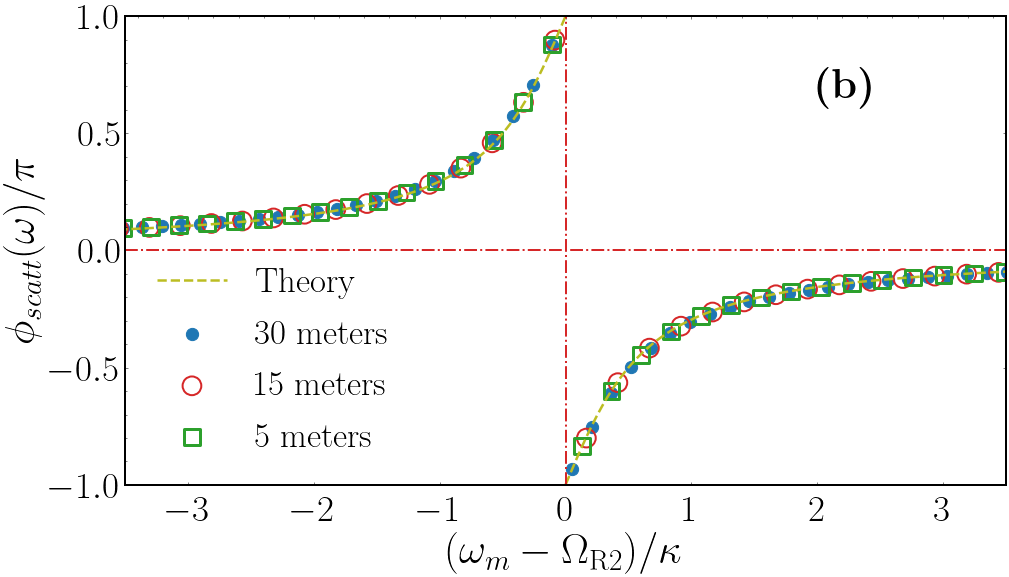

In [24]:
grid = {'hspace': 0.8, 'wspace': 0.5}
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 8), constrained_layout=True)
plt.rcParams.update({'font.size': 35})

# time1 = 2*b.tprop
# time2 = 2*d.tprop

# ax1.scatter(scattering_60m[0]/(2*π), scattering_60m[1], s=20, color = 'tab:olive', label='60 meters')
ax1.scatter((scattering_30m[0]-scattering_30m[3])/scattering_30m[2], scattering_30m[1], s=150, color = 'tab:blue', label='30 meters')
ax1.scatter((scattering_15m[0]-scattering_15m[3])/scattering_15m[2], scattering_15m[1], s=350, facecolors='none', edgecolors='tab:red', linewidth=2, label='15 meters')
ax1.scatter((scattering_5m[0]-scattering_5m[3])/scattering_5m[2], scattering_5m[1], s=250, marker='s', facecolors='none', edgecolors='tab:green', linewidth=3, label='5 meters')

xlistm=np.linspace(-10,-0.001,1000)
phi_theom=np.real(-1j*np.log(((1j*(xlistm)+(0.5)))/(1j*(xlistm)-(0.5)))/pi)
xlistp=np.linspace(0.001,10,1000)
phi_theop=np.real(-1j*np.log(((1j*(xlistp)+(0.5)))/(1j*(xlistp)-(0.5)))/pi)

ax1.plot(xlistm,phi_theom,'--', color = 'tab:olive', linewidth=2.5, label='Theory')
ax1.plot(xlistp,phi_theop,'--', color = 'tab:olive', linewidth=2.5)

ax1.set_ylabel('$\\phi_{\\text{scatt}}(\\omega)/\\pi $ ', {'fontsize': 42})
ax1.set_xlabel('$(\\omega_m-\\Omega_{\\text{R2}})/\\kappa$',  {'fontsize': 42})



ax1.set_ylabel('$\\phi_{scatt}(\\omega)/\\pi $ ', {'fontsize': 42})

ax1.text(2, 0.65,'\\textbf{(b)}',color='black', weight='bold', fontsize=42)
# ax1.text(8.422, 0.4,'$\\Omega_{\\text{R2}} = 8.406(2\\pi\\mathrm{GHz})$',color='black', fontsize=35)


ax1.legend(loc='lower left')
ax1.yaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(pad=10)
ax1.set_ylim(-1,1)
ax1.set_xlim(-3.5,3.5)
ax1.axhline(y = 0, color = 'tab:red', linestyle='-.', linewidth = 2)
ax1.axvline(x = 0, color = 'tab:red', linestyle='-.', linewidth = 2)


plt.show()
fig.savefig('../Newfigures/fig4b.svg')
fig.savefig('../Newfigures/fig4b.pdf')

In [22]:
η_list_1m = np.real(np.load('Scattering_Photon_L1_kappa100MHz_vseta.npy')[5])
z_sim_1m = np.load('Scattering_Photon_L1_kappa100MHz_vseta.npy')[0]
z_theo_1m = np.load('Scattering_Photon_L1_kappa100MHz_vseta.npy')[2]
c2_1m = np.load('Scattering_Photon_L1_kappa100MHz_vseta.npy')[4]

η_list_5m = np.real(np.load('Scattering_Photon_L5_kappa100MHz_vseta.npy')[5])
z_sim_5m = np.load('Scattering_Photon_L5_kappa100MHz_vseta.npy')[0]
z_theo_5m = np.load('Scattering_Photon_L5_kappa100MHz_vseta.npy')[2]
c2_5m = np.load('Scattering_Photon_L5_kappa100MHz_vseta.npy')[4]

η_list_15m = np.real(np.load('Scattering_Photon_L15_kappa100MHz_vseta.npy')[5])
z_sim_15m = np.load('Scattering_Photon_L15_kappa100MHz_vseta.npy')[0]
z_theo_15m = np.load('Scattering_Photon_L15_kappa100MHz_vseta.npy')[2]
c2_15m = np.load('Scattering_Photon_L15_kappa100MHz_vseta.npy')[4]

η_list_30m = np.real(np.load('Scattering_Photon_L30_kappa100MHz_vseta.npy')[5])
z_sim_30m = np.load('Scattering_Photon_L30_kappa100MHz_vseta.npy')[0]
z_theo_30m = np.load('Scattering_Photon_L30_kappa100MHz_vseta.npy')[2]
c2_30m = np.load('Scattering_Photon_L30_kappa100MHz_vseta.npy')[4]

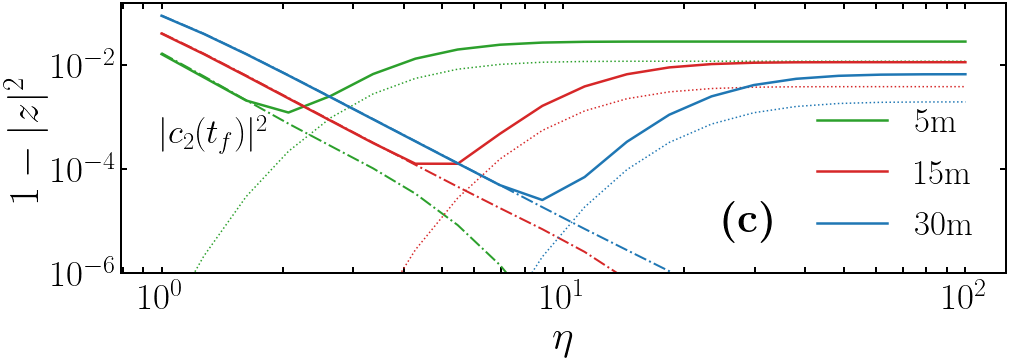

In [25]:
grid = {'hspace': 0.8, 'wspace': 0.5}
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 5), constrained_layout=True)
plt.rcParams.update({'font.size': 35})


# ax1.plot(η_list_1m,1-np.abs(z_sim_1m)**2,'--', color = 'tab:olive', linewidth=2.5, label='Simulation')
# ax1.plot(η_list_1m,1-np.abs(z_theo_1m)**2,'--', color = 'tab:pink', linewidth=2.5, label='Theory')

ax1.plot(η_list_5m,1-np.abs(z_sim_5m)**2,'-', color = 'tab:green', linewidth=2.5, label='5m')
ax1.plot(η_list_5m,1-np.abs(z_theo_5m)**2,'-.', color = 'tab:green', linewidth=2)
ax1.plot(η_list_5m, np.abs(c2_5m)**2,':', color = 'tab:green', linewidth=1.5)


ax1.plot(η_list_15m,1-np.abs(z_sim_15m)**2,'-', color = 'tab:red', linewidth=2.5, label='15m')
ax1.plot(η_list_15m,1-np.abs(z_theo_15m)**2,'-.', color = 'tab:red', linewidth=2)
ax1.plot(η_list_15m, np.abs(c2_15m)**2,':', color = 'tab:red', linewidth=1.5)


ax1.plot(η_list_30m,1-np.abs(z_sim_30m)**2,'-', color = 'tab:blue', linewidth=2.5, label='30m')
ax1.plot(η_list_30m,1-np.abs(z_theo_30m)**2,'-.', color = 'tab:blue', linewidth=2)
ax1.plot(η_list_15m, np.abs(c2_30m)**2,':', color = 'tab:blue', linewidth=1.5)



ax1.set_ylabel('$1 - |z|^2 $ ', {'fontsize': 42})
ax1.set_xlabel('$\\eta$',  {'fontsize': 42})




ax1.text(25, 6e-6, '\\textbf{(c)}',color='black', weight='bold', fontsize=42)
ax1.text(1, 3e-4,'$|c_2(t_f)|^2$',color='black', fontsize=35)


ax1.legend(loc='lower right')
ax1.yaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(pad=10)
ax1.set_ylim(1e-6,1.5e-1)
# ax1.set_xlim(-3.5,3.5)
# ax1.axhline(y = 0, color = 'tab:red', linestyle='-.', linewidth = 2)
# ax1.axvline(x = 0, color = 'tab:red', linestyle='-.', linewidth = 2)
ax1.semilogy()
ax1.semilogx()

ax1.tick_params(labelcolor='black', labelsize='small', width=2, length =6) 

# ax2.yaxis.set_minor_locator(MultipleLocator(1))
# ax2.set_yticks([1e-2,1e-1,1e0]) #,['10^1','10^2','10^3','10^4'])
ax1.tick_params(which='minor', color='black', width=2, length=6)

ax1.xaxis.set_tick_params(labelsize=37)
ax1.yaxis.set_tick_params(labelsize=37)
ax1.yaxis.set_tick_params(labelsize=37)

plt.show()
fig.savefig('../Newfigures/fig4c.svg')
fig.savefig('../Newfigures/fig4c.pdf')

In [24]:
duration_30m

array([13052.19273059, 10433.49848275,  8353.39570358,  6701.11133495,
        5388.65520916,  4346.1342516 ,  3518.03041972,  2860.24416478,
        2337.74597007,  1922.71090141,  1593.03682798,  1331.16740319,
        1123.15712528,   957.92868841,   826.68307583,   722.43098008,
         639.62059689,   573.8419714 ,   521.59215193,   480.08864506,
         447.12123772])

In [81]:
P_transfer_30m[:,-1]

array([12414.099759724872, 9860.872310945499, 7832.771786156287,
       6221.794478853879, 4942.1499434799225, 3925.692310109199,
       3118.291301040864, 2476.9496803256225, 1967.513569926315,
       1562.853611124304, 1241.4201270828999, 986.0954032248787,
       783.2819748651718, 622.178273558711, 494.20289858225146,
       392.5366054719614, 311.7571463458309, 247.54664847622473,
       196.45468215003922, 155.7038538278428, 123.03302612490977],
      dtype=object)

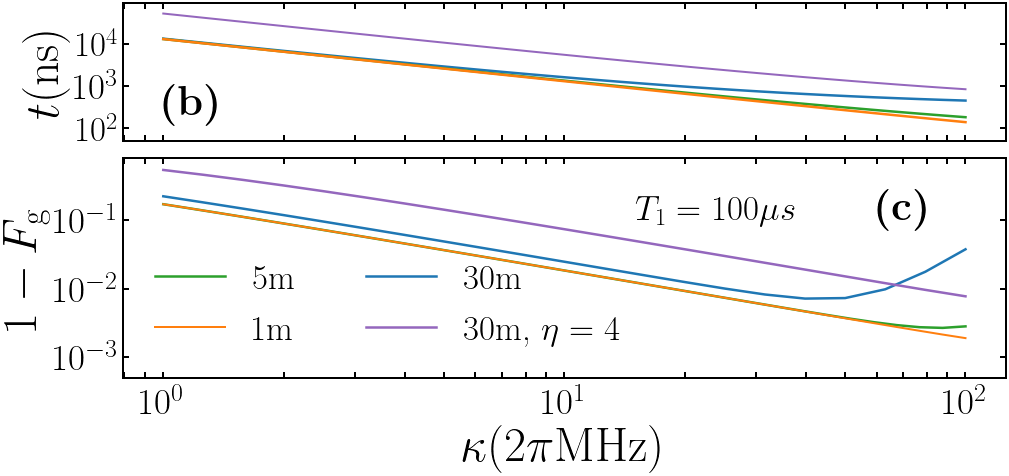

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,6.6), sharex=True, constrained_layout=True,  gridspec_kw={'height_ratios': [1, 1.6]})
fid_difr_30 = diffraction(l=30, κ=all_kappas)
fid_difr_30_quarter = diffraction(l=30, κ=all_kappas/4)
fid_difr_15 =  diffraction(l=5, κ=all_kappas)


duration_30m = setup.Exp2QB2Cavities(l=30).tprop + 2*(10/(all_kappas*0.5))
duration_30m_quarter = setup.Exp2QB2Cavities(l=30).tprop + 2*(10/(all_kappas*0.5*0.25))
duration_5m = setup.Exp2QB2Cavities(l=5).tprop + 2*(10/(all_kappas*0.5))
duration_30m_tenth = setup.Exp2QB2Cavities(l=30).tprop + 2*(10/(all_kappas/20))
duration_30m_half = setup.Exp2QB2Cavities(l=30).tprop + 2*(10/(all_kappas*0.5*0.5))
duration_1m = setup.Exp2QB2Cavities(l=1, mmax=60).tprop + 2*(10/(all_kappas*0.5))


ax1.loglog(all_kappas/(2e-3*π), 2*duration_30m, color = 'tab:blue',linewidth=2.5)
ax1.loglog(all_kappas/(2e-3*π), 2*duration_30m_quarter, color = 'tab:purple',linewidth=2)
ax1.loglog(all_kappas/(2e-3*π), 2*duration_5m, color = 'tab:green',linewidth=2.5)
ax1.loglog(all_kappas/(2e-3*π), 2*duration_1m, color = 'tab:orange',linewidth=2.5)



T1_1=100e-6*1e9

all_kappas = 2*π*np.logspace(0.0, 2.0, 36)*1e-3
ax2.plot(all_kappas/(2e-3*π), 1 - np.abs(P_transfer_5m[:,0]) * np.abs(P_transfer_5m[:,0]) * np.exp(-2 * np.array(P_transfer_5m[:,-1], dtype = float) / T1_1) , color = 'tab:green',linewidth=2.5, label = '5m')
ax2.plot(all_kappas/(2e-3*π), 1 - np.abs(P_transfer_1m_71modes[:,0]) * np.abs(P_transfer_1m_71modes[:,0]) * np.exp(-2 * np.array(P_transfer_1m_71modes[:,-1], dtype = float) / T1_1), color = 'tab:orange',linewidth=2, label = '1m')

all_kappas = 2*π*np.logspace(0.0, 2.0, 21)*1e-3
ax2.plot(all_kappas/(2e-3*π), 1 - np.abs(P_transfer_30m[:,0]) * np.abs(P_transfer_30m[:,0]) * np.exp(-2 * np.array(P_transfer_30m[:,-1], dtype = float) / T1_1) , color = 'tab:blue', linewidth=2.5, label = '30m')

ax2.plot(all_kappas/(2e-3*π), 1 - np.abs(P_transfer_30m_quarter[:,0]) * np.abs(P_transfer_30m_quarter[:,0]) * np.exp(-2 * np.array(P_transfer_30m_quarter[:,-1], dtype = float) / T1_1) ,linewidth=2.5, color='tab:purple', label = '30m, $\eta=4$')


# alpha2plot=0.3
# T1_2=50e-6*1e9
# ax2.plot(all_kappas/(2e-3*π), 1-np.load('q2_ST_L30.npy')*np.exp(-2*duration_30m/T1_2), color = 'tab:blue',linewidth=2.5, alpha=alpha2plot,label = '$T_1$=50$\\mu s$')
# ax2.plot(all_kappas/(2e-3*π), 1-np.load('state_transfer_30_quarter.npy')*np.exp(-2*duration_30m_quarter/T1_2), color = 'tab:orange',linewidth=2, alpha=alpha2plot)
# ax2.plot(all_kappas/(2e-3*π), 1-np.load('state_transfer_5_resonant_k.npy')*np.exp(-2*duration_5m/T1_2), color = 'tab:green',linewidth=2.5,alpha=alpha2plot)
ax1.set_ylabel('$t$(ns)', {'fontsize': 48})

ax1.yaxis.set_tick_params(labelsize=37)
ax1.xaxis.set_tick_params(pad=10)

ax1.set_ylim(.5e2,9e4)
ax1.tick_params(labelcolor='black', width=2, length =6)
ax1.tick_params(which='minor', color='black',  width=2, length=6)

ax1.set_yticks([1e2,1e3,1e4], minor = True) #,['10^1','10^2','10^3','10^4'])

# ax1.set_ylim(1e1,1e5)
# ax1.set_yticks((1,2,3,4))



ax2.semilogy()
ax2.semilogx()
ax2.set_xlabel('$\\kappa(2\\pi\mathrm{MHz})$', {'fontsize': 48})


ax2.set_ylabel('$1-F_{\mathrm{g}}$', {'fontsize': 48})

ax2.tick_params(labelcolor='black', labelsize='small', width=2, length =6)
ax2.tick_params(which='minor', color='black',  width=2, length=6)
ax2.text(15, 1e-1,'$T_1 = 100 \mu s$',color='black', fontsize=35)

ax2.set_ylim(.5e-3,0.8)
ax2.set_yticks([0.001,0.01,0.1]) #,['10^1','10^2','10^3','10^4'])
ax2.xaxis.set_tick_params(labelsize=37)
ax2.yaxis.set_tick_params(labelsize=37)
ax2.xaxis.set_tick_params(pad=10)
ax1.text(1,200, '\\textbf{(b)}',color='black', weight='bold', fontsize=42)
ax2.text(60, 1e-1, '\\textbf{(c)}',color='black', weight='bold', fontsize=42)


ax2.legend(loc='lower left', ncol=2)


plt.show()
fig.savefig('../Figures/fig5bc.svg')
fig.savefig('../Figures/fig5bc.pdf')

In [25]:
## Without Purcell filter but extended in \eta with and without optimized \chi
all_η=np.load('../Data/new_phase_gate_30m_50MHz_eta.npy')

new_phase_gate_5m_100MHz_opt=np.load('../Data/new_phase_gate_5m_100MHz_opt.npy')
new_phase_gate_5m_50MHz_opt=np.load('../Data/new_phase_gate_5m_50MHz_opt.npy')
new_phase_gate_30m_100MHz_opt=np.load('../Data/new_phase_gate_30m_100MHz_opt.npy')
new_phase_gate_30m_50MHz_opt=np.load('../Data/new_phase_gate_30m_50MHz_opt.npy')


F_5m_100MHz_theory=np.load('../Data/F_5m_100MHz_theory_new.npy')
F_5m_50MHz_theory=np.load('../Data/F_5m_50MHz_theory_new.npy')

F_30m_100MHz_theory=np.load('../Data/F_30m_100MHz_theory_new.npy')
F_30m_50MHz_theory=np.load('../Data/F_30m_50MHz_theory_new.npy')

all_ηt=np.linspace(1,10,42)

tau_5m_50MHz_phase_gate = np.load('../Data/tau_5m_50MHz_phase_gate..npy')
tau_30m_50MHz_phase_gate =  np.load('../Data/tau_30m_50MHz_phase_gate..npy')
tau_5m_100MHz_phase_gate = np.load('../Data/tau_5m_100MHz_phase_gate..npy')
tau_30m_100MHz_phase_gate = np.load('../Data/tau_30m_100MHz_phase_gate..npy')

In [26]:
# new_phase_gate_30m_50MHz_opt[:,-5], tau_30m_50MHz_phase_gate

/home/guillermo/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/guillermo/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/guillermo/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/guillermo/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


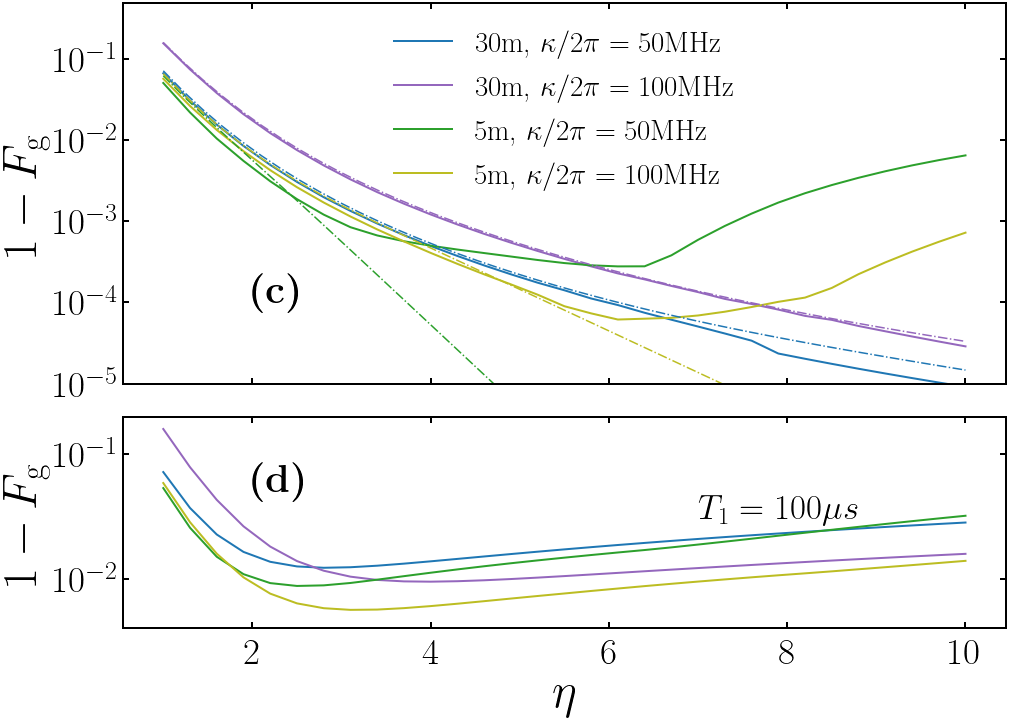

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10), sharex=True, constrained_layout=True,  gridspec_kw={'height_ratios': [1.8, 1]})

# plt.rcParams.update({'font.size': 32})

ax1.set_yscale('log')
ax2.set_yscale('log')


#p1 = ax1.plot(all_η, 1-np.abs(new_phase_gate_30m_50MHz[:,-1]), label='5m, 50[ MHz]',color='tab:blue',linewidth=2.5)
#p3 = ax1.plot(all_η, 1-np.abs(new_phase_gate_30m_100MHz[:,-1]), label='5m, 100[ MHz]',color='tab:orange',linewidth=2.5)
#p2 = ax1.plot(all_η, 1-np.abs(new_phase_gate_5m_50MHz[:,-1]), label='30m, 50[ MHz]',color='tab:green',linewidth=2.5)
#p4 = ax1.plot(all_η, 1-np.abs(new_phase_gate_5m_100MHz[:,-1]), label='30m, 100[ MHz]',color='tab:red',linewidth=2.5)

p1opt = ax1.plot(all_η, 1-np.abs(new_phase_gate_30m_50MHz_opt[:,-1]),'-',color='tab:blue',linewidth=2,label='30m, $\kappa/2\pi = 50$MHz')
p2opt = ax1.plot(all_η, 1-np.abs(new_phase_gate_30m_100MHz_opt[:,-1]),'-',color='tab:purple',linewidth=2,label='30m, $\kappa/2\pi = 100$MHz')
p3opt = ax1.plot(all_η, 1-np.abs(new_phase_gate_5m_50MHz_opt[:,-1]),'-',color='tab:green',linewidth=2,label='5m, $\kappa/2\pi = 50$MHz')
p4opt = ax1.plot(all_η, 1-np.abs(new_phase_gate_5m_100MHz_opt[:,-1]),'-',color='tab:olive',linewidth=2,label='5m, $\kappa/2\pi = 100$MHz')

p1theo = ax1.plot(all_ηt, 1-np.abs(F_30m_50MHz_theory), '-.',color='tab:blue',linewidth=1.5)
p2theo = ax1.plot(all_ηt, 1-np.abs(F_30m_100MHz_theory), '-.',color='tab:purple',linewidth=1.5)
p3theo = ax1.plot(all_ηt, 1-np.abs(F_5m_50MHz_theory), '-.',color='tab:green',linewidth=1.5)
p4theo = ax1.plot(all_ηt, 1-np.abs(F_5m_100MHz_theory), '-.',color='tab:olive',linewidth=1.5)

ax1.set_ylim(1e-5)
ax2.set_xlabel('$\\eta$', {'fontsize': 48})
##ax2.set_ylabel('$2T [\mathrm{ns}] $', {'fontsize': 30})
ax1.set_ylabel('$1-F_{\mathrm{g}}$', {'fontsize': 48})

# 
ax1.tick_params(labelcolor='black', labelsize='small', width=2, length =6) #Ricardo
ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.tick_params(which='minor', color='black', width=2, length=6)
ax1.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1]) #,['10^1','10^2','10^3','10^4'])

#

ax1.legend(fontsize='small', loc='upper center')

T1_1=100e3
T1_2=50e3
alpha2plot=0.3

ax2.plot(all_η, 1 - np.abs(new_phase_gate_30m_50MHz_opt[:,-1])  * np.exp(-(tau_30m_50MHz_phase_gate + new_phase_gate_30m_50MHz_opt[:,-5]) / T1_1),color='tab:blue',linewidth=2)
ax2.plot(all_η, 1 - np.abs(new_phase_gate_30m_100MHz_opt[:,-1]) * np.exp(-(tau_30m_100MHz_phase_gate + new_phase_gate_30m_100MHz_opt[:,-5]) / T1_1),color='tab:purple',linewidth=2)
ax2.plot(all_η, 1 - np.abs(new_phase_gate_5m_50MHz_opt[:,-1])   * np.exp(-(tau_5m_50MHz_phase_gate + new_phase_gate_5m_50MHz_opt[:,-5]) / T1_1),color='tab:green',linewidth=2)
ax2.plot(all_η, 1 - np.abs(new_phase_gate_5m_100MHz_opt[:,-1])  * np.exp(-(tau_5m_100MHz_phase_gate + new_phase_gate_5m_100MHz_opt[:,-5]) / T1_1), color='tab:olive',linewidth=2)


ax2.set_ylabel('$1-F_{\mathrm{g}}$', {'fontsize': 48})

ax2.set_ylim(4e-3,2e-1)
ax2.tick_params(labelcolor='black', labelsize='small', width=2, length =6) 
ax2.set_yticks([0.01,0.1]) #,['10^1','10^2','10^3','10^4'])


ax1.text(2, 1e-4,'\\textbf{(c)}',color='black', weight='bold', fontsize=40)
ax2.text(2, 5e-2,'\\textbf{(d)}',color='black', weight='bold', fontsize=40)
ax2.text(7,  3e-2,'$T_1 = 100 \mu s$',color='black', fontsize=35)

ax2.xaxis.set_tick_params(labelsize=37)
ax2.yaxis.set_tick_params(labelsize=37)
ax1.yaxis.set_tick_params(labelsize=37)

ax2.xaxis.set_tick_params(pad=10)


fig.savefig('../Figures/fig6cd.svg')
fig.savefig('../Figures/fig6cd.pdf')
fig.savefig('fig6cd.pdf')

plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


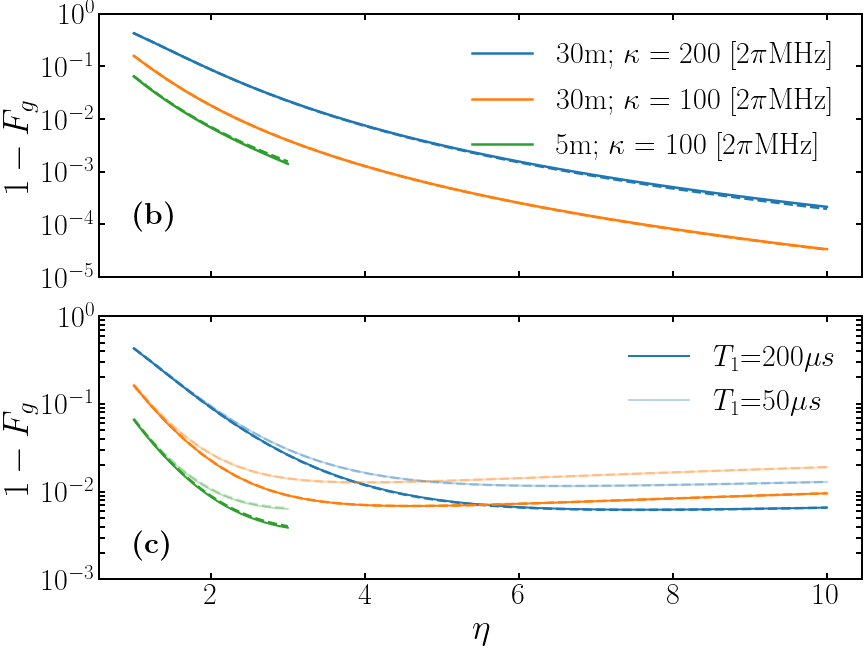

In [184]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,9), sharex=True,constrained_layout=True,  gridspec_kw={'height_ratios': [1, 1]})
# plt.tight_layout()
plt.rcParams.update({'font.size': 30})

ax1.plot(np.linspace(1,10,42),1-F_30m_200MHz_asim, color='tab:blue', linewidth=2.5, label =r'30m;  $\kappa$ = 200 [2$\pi$MHz]')
ax1.plot(np.linspace(1,10,42), (1-F_30m_200MHz_theory),'--', linewidth=2.5, color='tab:blue')


ax1.plot(np.linspace(1,10,42),1-F_30m_100MHz_asim, color='tab:orange', linewidth=2.5, label =r'30m; $\kappa$ = 100 [2$\pi$MHz]')
ax1.plot(np.linspace(1,10,42), (1-F_30m_100MHz_theory),'--', linewidth=2.5, color='tab:orange')

ax1.plot(np.linspace(1,3,21),1-F_5m_100MHz_asim, color='tab:green',linewidth=2.5, label = r'5m; $\kappa$ = 100 [2$\pi$MHz]')
ax1.plot(np.linspace(1,3,21), (1-F_5m_100MHz_theory),'--',linewidth=2.5, color='tab:green')

T1 = 100e-6
T2 = 50e-6

emission_30m_200MHz = np.exp(-phase_gate_30m_200MHz[:,4].real*1e-9/T1)
emission_30m_100MHz = np.exp(-phase_gate_30m_100MHz[:,4].real*1e-9/T1)
emission_5m_100MHz = np.exp(-phase_gate_5m_100MHz[:,4].real*1e-9/T1)

emission_30m_200MHz_2 = np.exp(-phase_gate_30m_200MHz[:,4].real*1e-9/T2)
emission_30m_100MHz_2 = np.exp(-phase_gate_30m_100MHz[:,4].real*1e-9/T2)
emission_5m_100MHz_2 = np.exp(-phase_gate_5m_100MHz[:,4].real*1e-9/T2)

ax2.plot(np.linspace(1,10,42),1-F_30m_200MHz_asim*emission_30m_200MHz, linewidth = 2, color = 'tab:blue', label = '$T_1$=200$\\mu s$')
ax2.plot(np.linspace(1,10,42),1-F_30m_100MHz_asim*emission_30m_100MHz, linewidth = 2, color='tab:orange')
ax2.plot(np.linspace(1,3,21),1-F_5m_100MHz_asim*emission_5m_100MHz, linewidth = 2, color='tab:green')

ax2.plot(np.linspace(1,10,42), (1-F_30m_200MHz_theory*emission_30m_200MHz),'--',linewidth=2.5,color = 'tab:blue')
ax2.plot(np.linspace(1,10,42), (1-F_30m_100MHz_theory*emission_30m_100MHz),'--',linewidth=2.5,color='tab:orange')
ax2.plot(np.linspace(1,3,21), (1-F_5m_100MHz_theory*emission_5m_100MHz),'--',linewidth=2.5,color='tab:green')

ax2.plot(np.linspace(1,10,42),1-F_30m_200MHz_asim*emission_30m_200MHz_2, linewidth = 2, color = 'tab:blue', alpha=0.3, label = '$T_1$=50$\\mu s$')
ax2.plot(np.linspace(1,10,42),1-F_30m_100MHz_asim*emission_30m_100MHz_2, linewidth = 2, color='tab:orange', alpha=0.3)
ax2.plot(np.linspace(1,3,21),1-F_5m_100MHz_asim*emission_5m_100MHz_2, linewidth = 2, color='tab:green', alpha=0.3)

ax2.plot(np.linspace(1,10,42), (1-F_30m_200MHz_theory*emission_30m_200MHz_2),'--',linewidth=2.5,color = 'tab:blue', alpha=0.3)
ax2.plot(np.linspace(1,10,42), (1-F_30m_100MHz_theory*emission_30m_100MHz_2),'--',linewidth=2.5,color='tab:orange', alpha=0.3)
ax2.plot(np.linspace(1,3,21), (1-F_5m_100MHz_theory*emission_5m_100MHz_2),'--',linewidth=2.5,color='tab:green', alpha=0.3)

# 
ax1.tick_params(labelcolor='black', labelsize='small', width=2, length =6) #Ricardo
ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.tick_params(which='minor', color='black', width=2, length=6)
ax1.tick_params(which='major', color='black', width=2, length=6)

ax1.set_yscale('log')
ax1.legend()
ax1.set_ylabel('$$1-F_g$$', {'fontsize': 36})
ax1.set_ylim(1e-5,1e0)
ax1.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])

ax2.set_yscale('log')
ax2.legend(loc='upper right')

ax2.set_ylim(1e-3,1e0)
ax2.tick_params(which='minor', color='black', width=2, length=6)
ax2.tick_params(which='major', color='black', width=2, length=6)

ax2.set_yticks([1e-3,1e-2,1e-1,1])

#


ax2.set_xlabel('$$\\eta$$', {'fontsize': 36})
ax2.set_ylabel('$$1-F_g$$', {'fontsize': 36})

ax1.text(1, 1e-4,'\\textbf{(b)}',color='black', weight='bold', fontsize=30)
ax2.text(1, 2e-3,'\\textbf{(c)}',color='black', weight='bold', fontsize=30)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.yaxis.set_tick_params(labelsize=30)
ax1.yaxis.set_tick_params(labelsize=30)

plt.show()

#fig.savefig('../Figures/complete-phase-gate.svg')
fig.savefig('complete-phase-gate-edited.pdf')